## Importations

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

## Valeurs initiales

In [2]:
W1 = torch.from_numpy(np.array([[0., 1.], [0., -1]])).type(torch.float)
W2 = torch.from_numpy(np.array([[1., 2.], [2., -1]])).type(torch.float)

x = torch.from_numpy(np.array([1., 1.])).type(torch.float)
y = torch.from_numpy(np.array([1., 0.])).type(torch.float)

## Model

In [3]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 2, bias=False),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 2, bias=False)
)

with torch.no_grad():
    model[0].weight.copy_(W1)
    model[-1].weight.copy_(W2)

## Fonction de perte

In [4]:
loss_fn = torch.nn.CrossEntropyLoss()

lr = 0.01 # Learning rate

optimizer = torch.optim.SGD(model.parameters(), lr=lr)

0 tensor(1.3133, grad_fn=<DivBackward1>)
1 tensor(1.2921, grad_fn=<DivBackward1>)
2 tensor(1.2517, grad_fn=<DivBackward1>)
3 tensor(1.1955, grad_fn=<DivBackward1>)
4 tensor(1.1282, grad_fn=<DivBackward1>)
5 tensor(1.0548, grad_fn=<DivBackward1>)
6 tensor(0.9805, grad_fn=<DivBackward1>)
7 tensor(0.9098, grad_fn=<DivBackward1>)
8 tensor(0.8462, grad_fn=<DivBackward1>)
9 tensor(0.7921, grad_fn=<DivBackward1>)


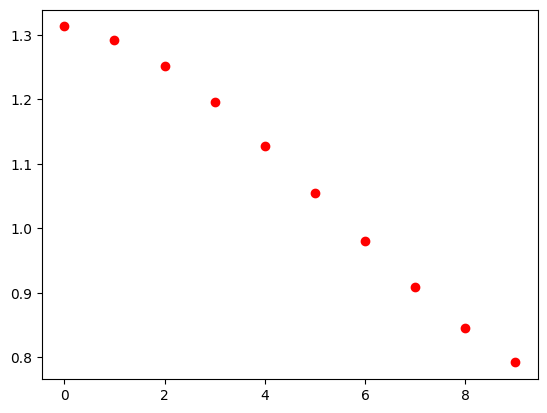

In [5]:
for t in range(10):
    # ! y_pred = forward_pass(x, W1, W2)
    y_pred = model(x)
    erreur = loss_fn(y_pred, y)

    erreur.backward()
    print(t, erreur)
    
    optimizer.step()

    plt.plot(t, erreur.item(), 'ro')